In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [42]:
train_path = './data/train.csv'
test_path = './data/test.csv'
store_path = './data/store.csv'

#loading datasets

train = pd.read_csv(train_path, parse_dates=['Date'])
test = pd.read_csv(test_path, parse_dates=['Date'])
store = pd.read_csv(store_path)
print(train.shape,test.shape,store.shape)

(1017209, 9) (41088, 8) (1115, 10)


Now performing over the Store dataset

In [43]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [44]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [45]:
store.isnull().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Lots of missed values 

<Axes: >

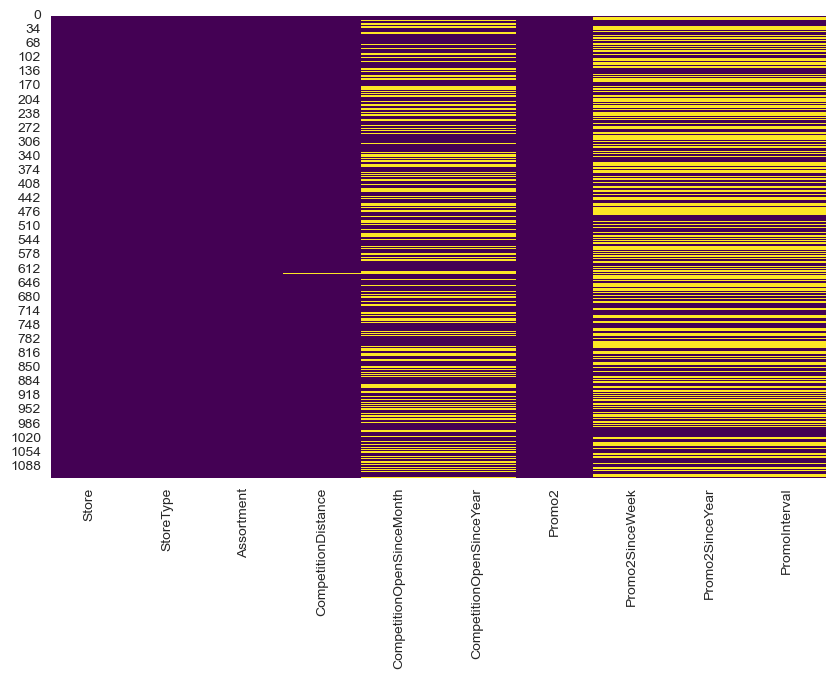

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(store.isnull(), cbar=False, cmap='viridis')

<Axes: xlabel='StoreType'>

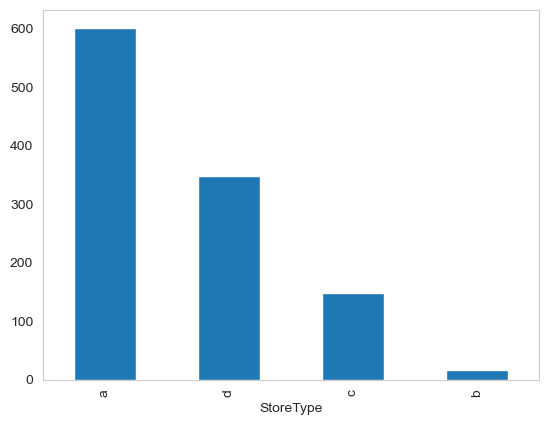

In [47]:
store['StoreType'].value_counts().plot(kind='bar')

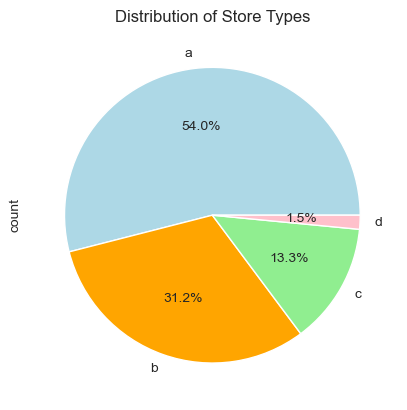

In [48]:
lables = ['a','b','c','d']
#now check how many exactly are missing 
colors = ['lightblue', 'orange', 'lightgreen', 'pink']
store['StoreType'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors, labels=lables)
plt.title('Distribution of Store Types')
plt.show()

find percentage of missing values


In [49]:
def find_missing_percentage(df):
    missing_percentages = df.isnull().mean() * 100
    return missing_percentages
missing_percentages = find_missing_percentage(store)
print(missing_percentages)

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64


In [50]:
#removing columns with high missing values
store = store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

(1115, 5)


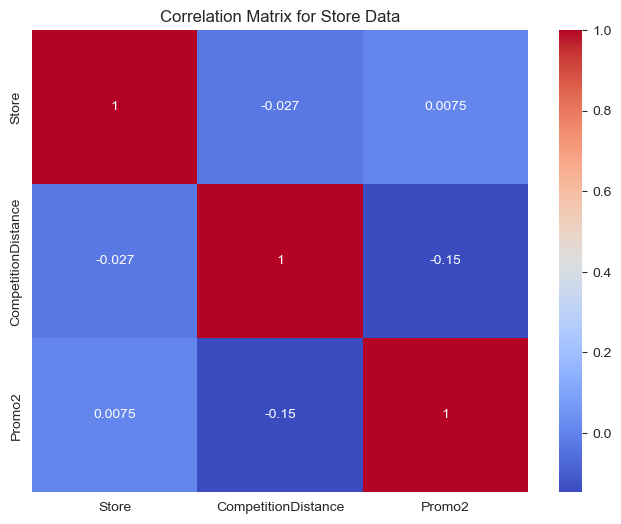

   Store StoreType Assortment  CompetitionDistance  Promo2
0      1         c          a               1270.0       0
1      2         a          a                570.0       1
2      3         a          a              14130.0       1
3      4         c          c                620.0       0
4      5         a          a              29910.0       0


In [51]:
#now checking the data with corre
print(store.shape)
corr = store.select_dtypes(include='number').corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Store Data')
plt.show()
print(store.head())

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64
3


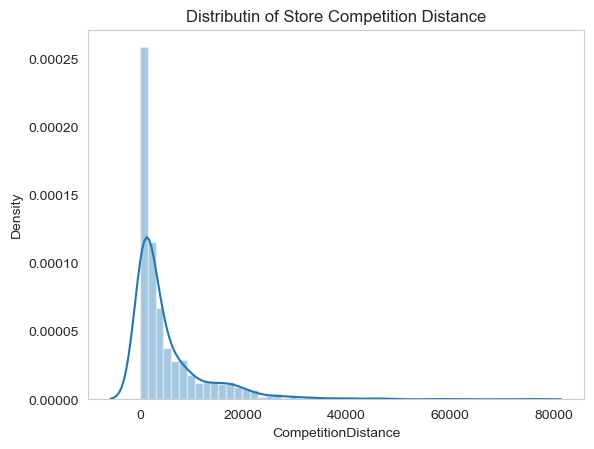

In [52]:
sns.distplot(store.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")
print(store.CompetitionDistance.describe())
print(store.CompetitionDistance.isnull().sum())

In [53]:
#fixing missing values in CompetitionDistance by median imputation
median_competition_distance = store['CompetitionDistance'].median()
store['CompetitionDistance'].fillna(median_competition_distance, inplace=True)  

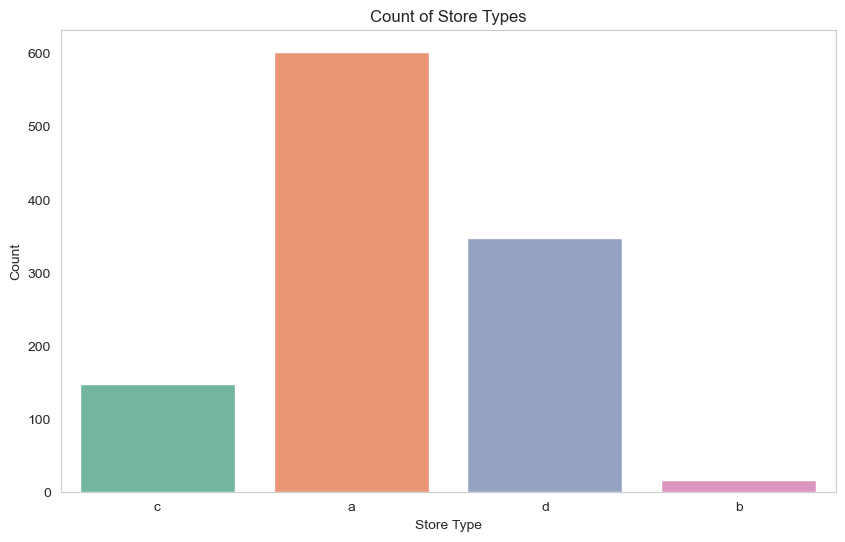

In [54]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10,6))
sns.countplot(x='StoreType', data=store, palette='Set2')
plt.title('Count of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()


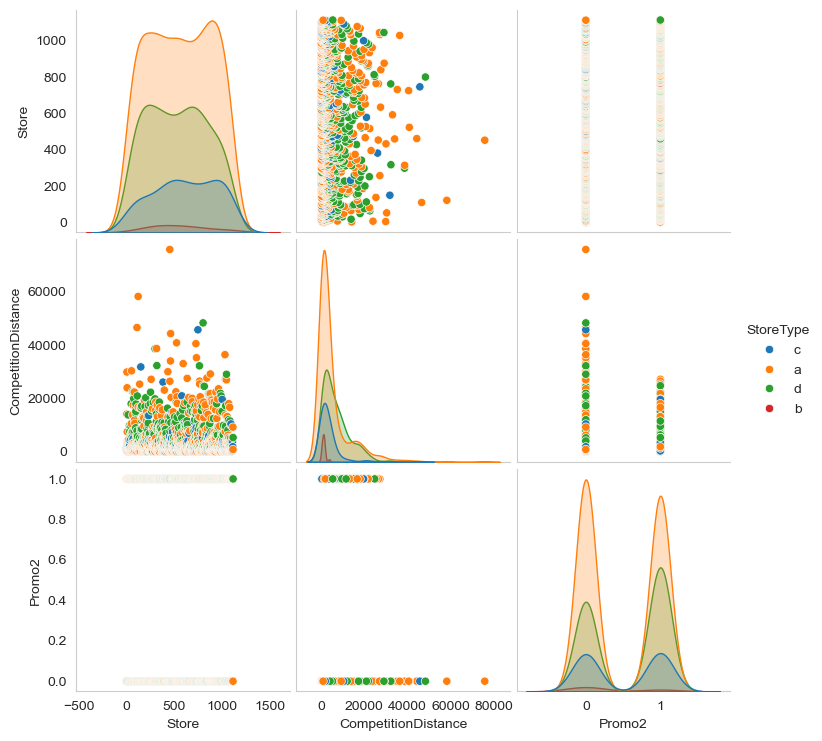

In [55]:
sns.pairplot(store,hue='StoreType')


In [57]:
print(train.head())

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [59]:
#transforming date to extract more features
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['WeekOfYear'] = train['Date'].dt.isocalendar().week
train['DayOfWeek'] = train['Date'].dt.dayofweek
print(train.head())

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          4 2015-07-31   5263        555     1      1            0   
1      2          4 2015-07-31   6064        625     1      1            0   
2      3          4 2015-07-31   8314        821     1      1            0   
3      4          4 2015-07-31  13995       1498     1      1            0   
4      5          4 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  Year  Month  Day  WeekOfYear  
0              1  2015      7   31          31  
1              1  2015      7   31          31  
2              1  2015      7   31          31  
3              1  2015      7   31          31  
4              1  2015      7   31          31  


plotting the sales vs year graph

Performing Merging of the dataset

In [ ]:
print(train.shape)
print(store.shape)

(1017209, 9)
(1115, 5)


In [65]:
df = pd.merge(train, store, how='left', on='Store')
#now converting into the another file for the original training purpose
df.to_csv('./data/train_merged.csv', index=False)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,4,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2,4,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,3,4,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,4,4,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,5,4,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  object        
 8   SchoolHoliday        1017209 non-null  int64         
 9   StoreType            1017209 non-null  object        
 10  Assortment           1017209 non-null  object        
 11  CompetitionDistance  1017209 non-null  float64       
 12  Promo2               1017209 non-null  int64         
dt

In [ ]:
df = df.drop(['StateHoliday'], axis=1)

In [ ]:
toTrain = train.to_csv('train_merged.csv', index=False)
